In [1]:
from utils.qc_and_rna_separation import *

### Define path to experimental data

In [2]:
path = "/mnt/storage2/minibulk_experiments/new_data/exp2_reseq"

### Read data

In [3]:
meta = read_meta(path)
counts, rpkms = read_expression_data(path)
conv_probs = read_conversion_probabilities(path)
conv_rates = read_conversion_rates(path, meta)
pigs, pig_matrix = read_pigs(path, CI_threshold = None)
stats_df = read_sequencing_stats(path, meta, pigs, conv_probs)

Reading meta data from /mnt/storage2/minibulk_experiments/new_data/exp2_reseq/meta/meta.txt


Reading expression data from /mnt/storage2/minibulk_experiments/new_data/exp2_reseq/expression
Counts shape:  (47552, 732)
RPKMs shape:   (47552, 732)
The shape of the expression matrices match


Reading conversion probabilities from /mnt/storage2/minibulk_experiments/new_data/exp2_reseq/pcs/conv_probs.txt


Reading conversion rates from /mnt/storage2/minibulk_experiments/new_data/exp2_reseq/stats/conversionrates.csv


Reading pi_g values from /mnt/storage2/minibulk_experiments/new_data/exp2_reseq/pigs/pigs.txt
No C.I threshold supplied


/home/nbserver/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)




Reading sequencing stats from /mnt/storage2/minibulk_experiments/new_data/exp2_reseq/stats/readspercell.txt




### Make QC plots and decide on data filters

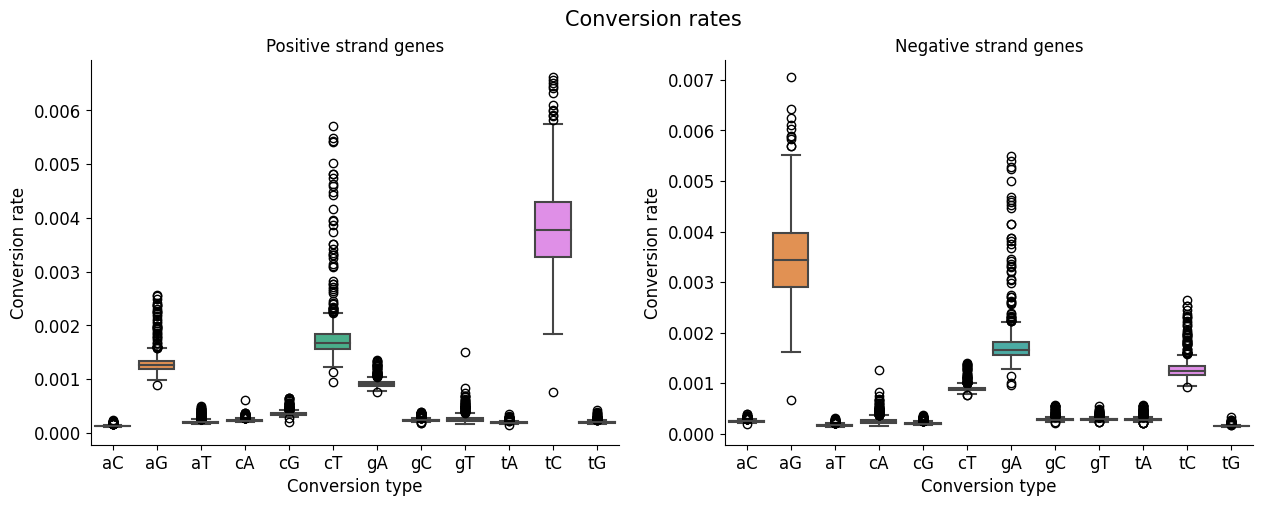

In [4]:
plot_conversion_rates(conv_rates, outpath = "./results/plots/conversion_rates.pdf")

Saving file to ./results/plots/pi_g_read_depth_dependence.png...


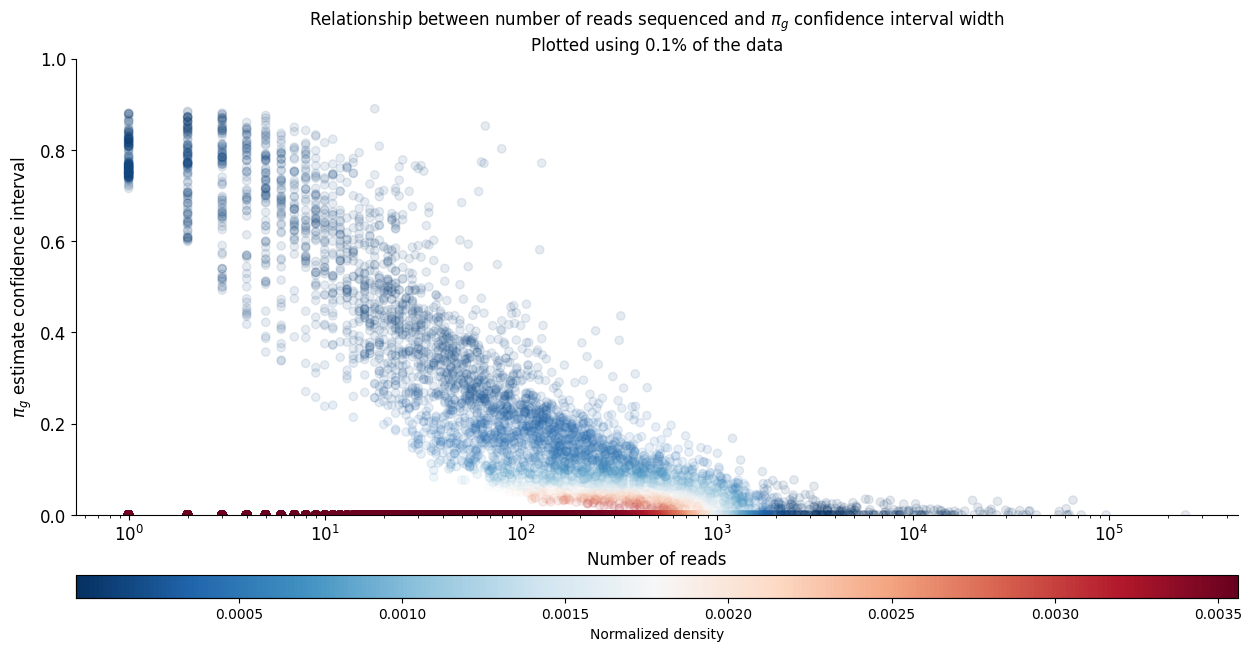

In [5]:
plot_pig_read_depth_dependence(pigs, outpath = "./results/plots/pi_g_read_depth_dependence.png")

Saving file to ./results/plots/condition_filtering.pdf...


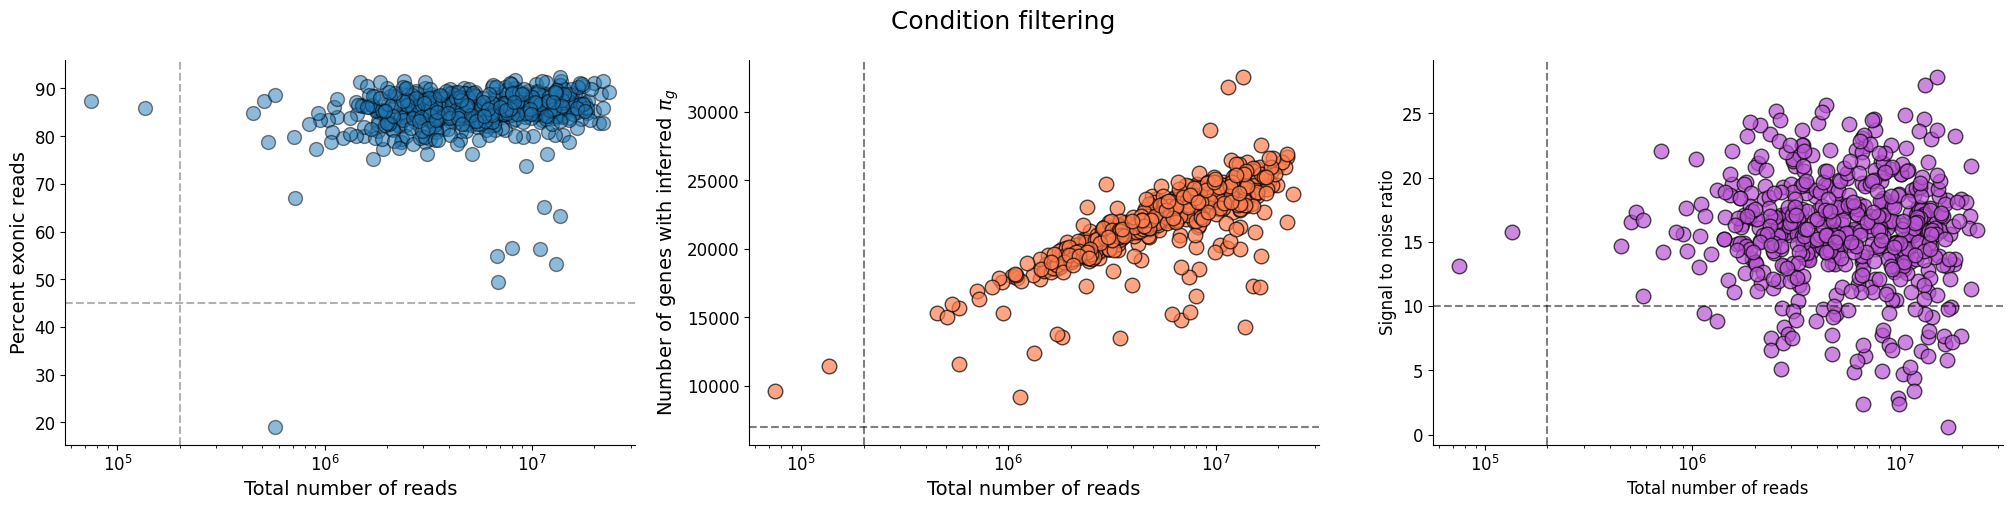

In [6]:
filter_params = plot_readstats(stats_df,
                               readcount_threshold = 200_000,
                               ngene_threshold = 7000,
                               exon_threshold = 45, snr_threshold = 10,
                               ngene_accessor = 'ngenes_with_pigs',
                               outpath = "./results/plots/condition_filtering.pdf")

### When we are content with the filtering thresholds, we save the conditions that pass to file

In [7]:
conds_to_keep = save_conditions_to_keep(stats_df, outpath = "./results/meta/conds_to_keep.txt", **filter_params)

Writing kept conditions to ./results/meta/conds_to_keep.txt


In [8]:
filtered_counts,\
filtered_rpkms,\
filtered_pig_matrix,\
filtered_meta,\
filtered_stats_df = filter_conditions(counts, rpkms, pig_matrix, meta, stats_df, conds_to_keep)

Filtering conditions...


In [9]:
new_counts,\
old_counts,\
summed_tot_counts,\
new_rpkms,\
old_rpkms,\
summed_tot_rpkms = separate_expression_matrices(filtered_counts, filtered_rpkms, filtered_pig_matrix,
                                                outfolder = "./results/expression")

Separating expression matrices into new and pre-existing RNA...
Saving expression matrices to ./results/expression
